In [24]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [4]:
os.getcwd()

'/Users/tim/Documents/Github/python_viz/Course Assignment Notebooks'

In [6]:
hotels = pd.read_excel("../Data/HotelCustomersDataset.xlsx")

hotels["date"] =  (pd.to_datetime("2018-12-31")
                   - pd.to_timedelta(hotels["DaysSinceCreation"], unit="D"))

In [10]:
hotels.head()
hotels.describe()
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID                    83590 non-null  int64         
 1   Nationality           83590 non-null  object        
 2   Age                   79811 non-null  float64       
 3   DaysSinceCreation     83590 non-null  int64         
 4   AverageLeadTime       83590 non-null  int64         
 5   LodgingRevenue        83590 non-null  float64       
 6   OtherRevenue          83590 non-null  float64       
 7   BookingsCanceled      83590 non-null  int64         
 8   BookingsNoShowed      83590 non-null  int64         
 9   BookingsCheckedIn     83590 non-null  int64         
 10  PersonsNights         83590 non-null  int64         
 11  RoomNights            83590 non-null  int64         
 12  DaysSinceLastStay     83590 non-null  int64         
 13  DaysSinceFirstSt

# Assignment 1: Plotting DataFrames

* Plot the `LodgingRevenue` and `OtherRevenue` columns in a line chart from the `monthly_revenue` DataFrame created below.  
* Make sure your x-axis is the `date` column.

In [11]:
daily_revenue = (
    hotels
    .groupby("date")
    .agg({"LodgingRevenue":"sum", "OtherRevenue":"sum"})
)

monthly_revenue = daily_revenue.resample("ME").sum()

monthly_revenue.head()


,LodgingRevenue,OtherRevenue
date,,
2016-01-31,124531.34,52190.50
2016-02-29,131689.12,51203.13
2016-03-31,443476.86,127336.11
2016-04-30,500966.80,145228.87
2016-05-31,634200.17,143359.35


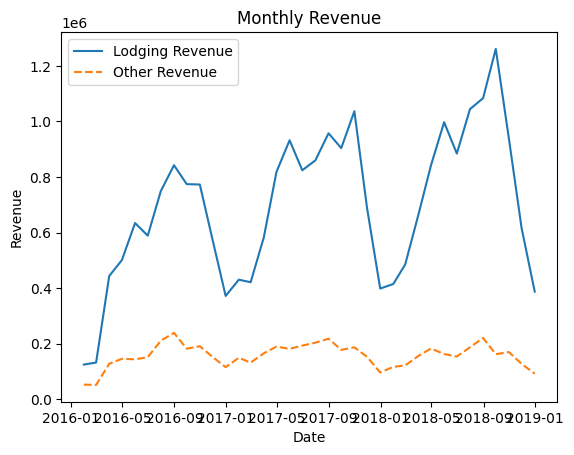

In [16]:
fig, ax = plt.subplots()
ax.plot(monthly_revenue.index, monthly_revenue["LodgingRevenue"], label="Lodging Revenue");
ax.plot(monthly_revenue.index, monthly_revenue["OtherRevenue"], label="Other Revenue", ls = "--");
ax.set_title("Monthly Revenue")
ax.set_xlabel("Date")
ax.set_ylabel("Revenue")
ax.legend()
plt.show()

# Assignment 2: Formatted Line Chart

Plot the monthly sum of `LodgingRevenue` and `OtherRevenue`.

Make sure to add titles and a y-axis label, remove the top and right borders, and add a legend.

Consider modifying the font sizes as well.

Thanks!

In [18]:
daily_revenue = (
    hotels
    .groupby("date")
    .agg({"LodgingRevenue":"sum", "OtherRevenue":"sum"})
)

monthly_revenue = daily_revenue.resample("ME").sum()


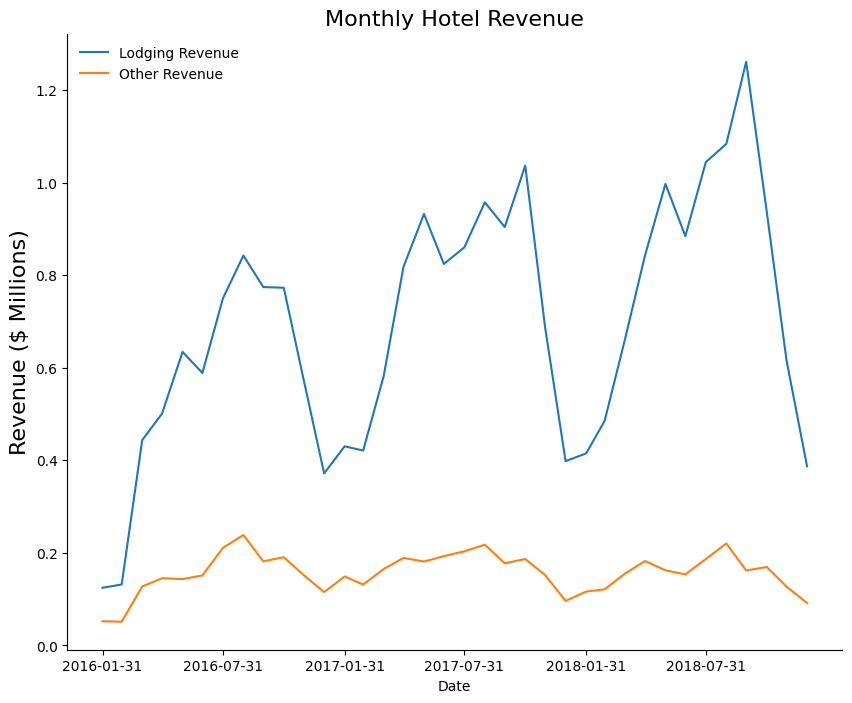

In [45]:
fig, ax = plt.subplots(figsize = (10, 8))

ax.plot(monthly_revenue.index, monthly_revenue["LodgingRevenue"]/1e6, label="Lodging Revenue")
ax.plot(monthly_revenue.index, monthly_revenue["OtherRevenue"]/1e6, label="Other Revenue")

ax.set_title("Monthly Hotel Revenue", fontsize = 16)
ax.set_xlabel("Date")
ax.set_ylabel("Revenue ($ Millions)",  fontsize = 16)

ax.legend(frameon=False, loc = "upper left")
ax.set_xticks(monthly_revenue.index[::6])

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)



plt.show()

# Assignment 2: Dual Axis Line Chart

* Plot the sum of nights booked and the sum of cancellations on a quarterly basis (resample("Q") will help). 

* Plot them in the same chart but different Y-Axes.

* Make sure to add titles and axis labels, remove scientific notation, and add a legend.

* Consider modifying the font sizes as well.

Thanks!

*Note: I accidentally repeated the assignment numbers, but leaving as is to align with video numbering*

In [47]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID                    83590 non-null  int64         
 1   Nationality           83590 non-null  object        
 2   Age                   79811 non-null  float64       
 3   DaysSinceCreation     83590 non-null  int64         
 4   AverageLeadTime       83590 non-null  int64         
 5   LodgingRevenue        83590 non-null  float64       
 6   OtherRevenue          83590 non-null  float64       
 7   BookingsCanceled      83590 non-null  int64         
 8   BookingsNoShowed      83590 non-null  int64         
 9   BookingsCheckedIn     83590 non-null  int64         
 10  PersonsNights         83590 non-null  int64         
 11  RoomNights            83590 non-null  int64         
 12  DaysSinceLastStay     83590 non-null  int64         
 13  DaysSinceFirstSt

In [51]:
room_nights =  (hotels
    .groupby("date")
    .agg({"RoomNights":"sum", "BookingsCanceled":"sum"})
)

quarterly_bookings = room_nights.resample("QE").sum()

In [52]:
quarterly_bookings.head()

,RoomNights,BookingsCanceled
date,,
2016-03-31,8464,15
2016-06-30,15535,26
2016-09-30,19517,27
2016-12-31,15404,17
2017-03-31,15206,12


Text(0.5, 0.92, 'Nights Booked vs. Cancellations')

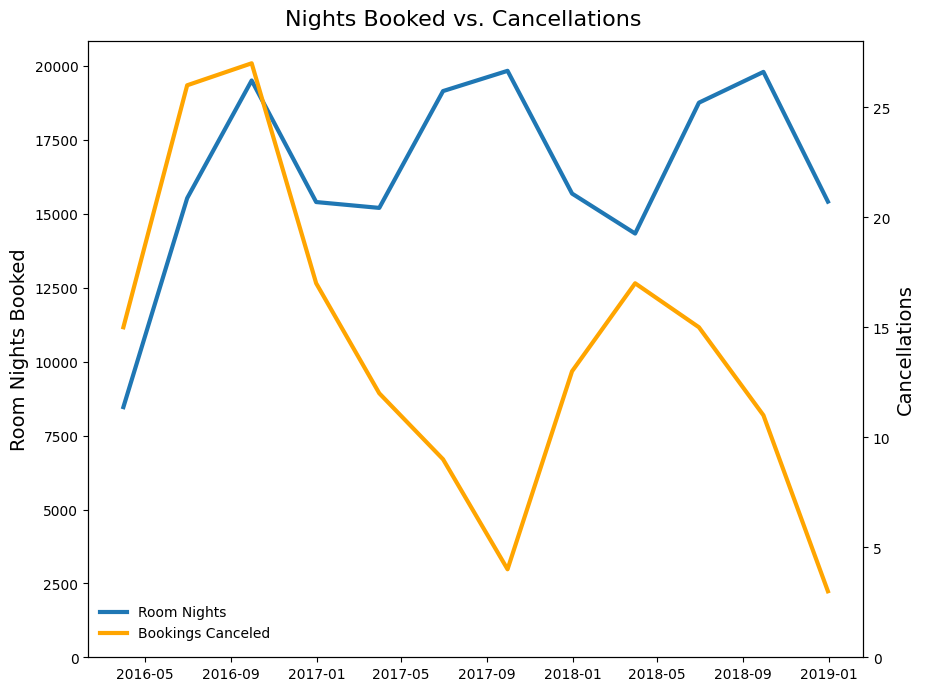

In [78]:
# Plot the dataframe on the same chart but with different y-axes
# Grab max value for boookings and cancellations
book_max = quarterly_bookings["RoomNights"].max()
cancel_max = quarterly_bookings["BookingsCanceled"].max()

fig, ax = plt.subplots(figsize = (10, 8))

ax.plot(
    quarterly_bookings.index, 
    quarterly_bookings['RoomNights'], 
    label = "Room Nights", 
    linewidth = 3
    )

ax.set_ylim(0, book_max + 1000)
ax.set_ylabel("Room Nights Booked", fontsize = 14)

ax2 = ax.twinx()

ax2.plot(
    quarterly_bookings.index, 
    quarterly_bookings['BookingsCanceled'], 
    label = "Bookings Canceled", 
    color = "orange",
    linewidth = 3
    )

ax2.set_ylim(0, 28)
ax2.set_ylabel("Cancellations", fontsize = 14)


fig.legend(bbox_to_anchor=(.32, .19), frameon = False)
fig.suptitle("Nights Booked vs. Cancellations", fontsize = 16, y = .92)


# Assignment 3: Bar Chart

* Create a bar chart of total room nights booked by country. Limit your results to the top 10 countries.

* Then, build a horizontal bar chart of lodging revenue by country for the same countries in your room nights chart.

* As always, make sure to add labels to your chart!

In [109]:
hotels.head()
hotels.columns

Index(['ID', 'Nationality', 'Age', 'DaysSinceCreation', 'AverageLeadTime',
       'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
       'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
       'DaysSinceLastStay', 'DaysSinceFirstStay', 'DistributionChannel',
       'MarketSegment', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom', 'date'],
      dtype='object')

In [110]:
countries = (
    hotels
    .groupby("Nationality")
    .agg({"RoomNights":"sum", "LodgingRevenue":"sum"})
    .sort_values("RoomNights", ascending=False)
    .iloc[:10]
)
countries.rename(columns = {"RoomNights" : "room_nights", "LodgingRevenue":"lodging_revenue"}, inplace=True)

countries

,room_nights,lodging_revenue
Nationality,,
FRA,31018,3809315.59
DEU,26334,3113382.55
PRT,24334,2715008.72
GBR,20822,2693123.61
ESP,10877,1475909.33
ITA,8046,1032729.72
BEL,7758,1047661.98
NLD,6619,904460.78
BRA,6535,787928.01


Text(0, 0.5, 'Room Nights')

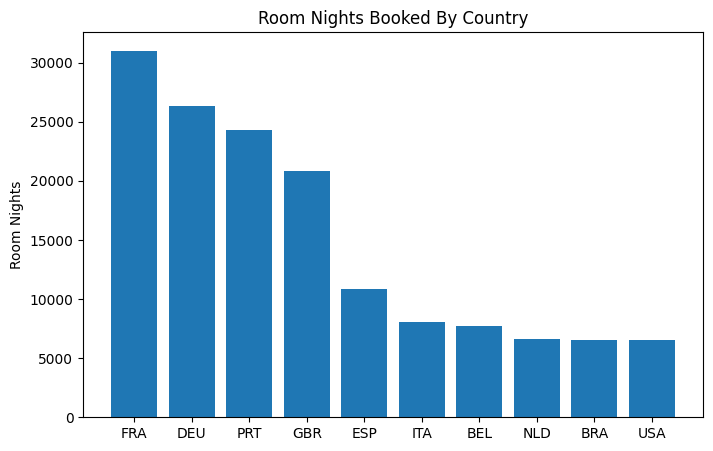

In [93]:
fig, ax = plt.subplots(figsize = (8, 5))

ax.bar(countries.index, countries["room_nights"])
ax.set_title("Room Nights Booked By Country")
ax.set_ylabel("Room Nights")



Text(0.5, 0, 'Revenue (Million Euro)')

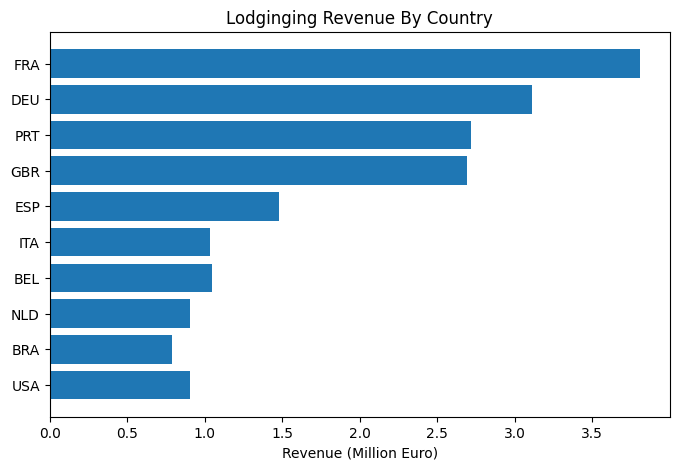

In [103]:
countries_rev = countries.iloc[::-1]

fig, ax = plt.subplots(figsize = (8, 5))

ax.barh(countries_rev.index, countries_rev["lodging_revenue"]/1e6)
ax.set_title("Lodginging Revenue By Country")
ax.set_xlabel("Revenue (Million Euro)")


# Assignment 4: Advanced Bar Charts

* Build a grouped bar chart of our top 5 countries with LodgingRevenue and OtherRevenue as bars for each.
* Then, build a 100% bar chart stacked bar chart of LodgingRevenue and OtherRevenue. Add a reference line at 80%, which is our baseline. 

Thanks!

In [124]:
country_list = ["FRA", "DEU", "PRT", "GBR", "ESP"]
#country_subset = countries[countries.index.isin(country_list)]

cntry_rev = (
    hotels
    .groupby("Nationality")
    .agg({"LodgingRevenue":"sum", "OtherRevenue":"sum"})
    .sort_values("LodgingRevenue", ascending=False)
)

# Can also do as follows
# cntry_rev = (hotels
#             .loc[hotels["Nationality"].isin(country_list)]
#             .groupby("Nationality")
#             .agg({"LodgingRevenue":"sum", "OtherRevenue":"sum"})
#             .sort_values("LodgingRevenue", ascending=False)
#             )

cntry_rev_subset = cntry_rev[cntry_rev.index.isin(country_list)]
cntry_rev_subset.head()

,LodgingRevenue,OtherRevenue
Nationality,,
FRA,3809315.59,1033166.30
DEU,3113382.55,725541.53
PRT,2715008.72,665634.58
GBR,2693123.61,591212.77
ESP,1475909.33,319840.82


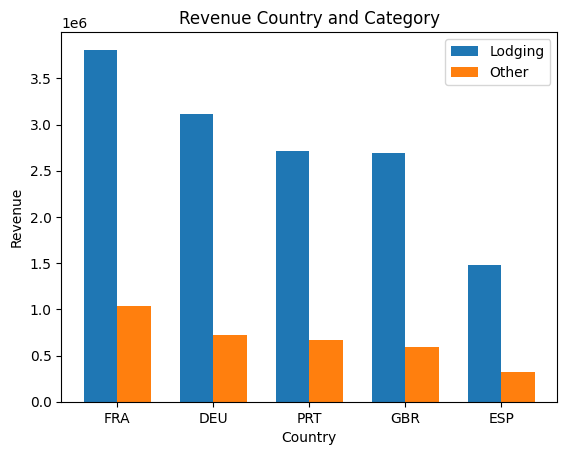

In [133]:
# Built a grouped bar chart using matplotlib 

fig, ax = plt.subplots()

x = np.arange(0, len(cntry_rev_subset))
width = 0.35

ax.bar(x - width/2, cntry_rev_subset["LodgingRevenue"], width, label = "Lodging")
ax.bar(x + width/2, cntry_rev_subset["OtherRevenue"], width, label = "Other")

ax.set_title("Revenue Country and Category")
ax.set_ylabel("Revenue")
ax.set_xlabel("Country")

ax.legend()

plt.xticks(range(len(cntry_rev_subset)), country_list);

In [156]:
# Now, build a 100% stacked bar chart showing how much each revenue category contributes to overall country revenue
cntry_rev_share = cntry_rev_subset.apply(lambda x: x * 100 / sum(x), axis = 1)
cntry_rev_share

,LodgingRevenue,OtherRevenue
Nationality,,
FRA,78.664529,21.335471
DEU,81.100394,18.899606
PRT,80.310417,19.689583
GBR,81.999019,18.000981
ESP,82.189013,17.810987


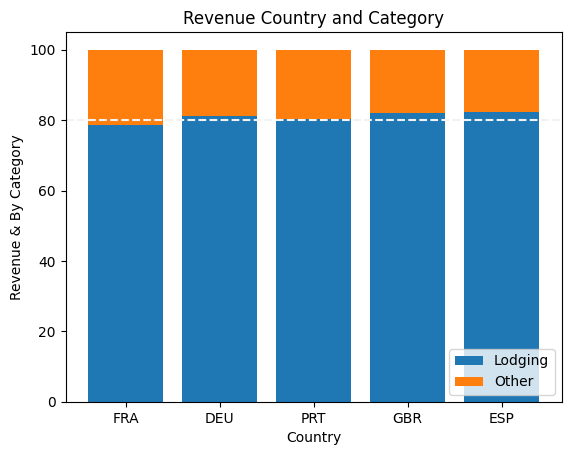

In [148]:
# Now build the stacked bar braph
fig, ax = plt.subplots()

ax.bar(cntry_rev_share.index, 
       cntry_rev_share["LodgingRevenue"],
       label = "Lodging")

ax.bar(cntry_rev_share.index, 
       cntry_rev_share["OtherRevenue"],
       label = "Other", 
       bottom = cntry_rev_share["LodgingRevenue"])

ax.axhline(y = 80,
           color = "#f2f2f2", ls = "--")

ax.set_title("Revenue Country and Category")
ax.set_ylabel("Revenue & By Category")
ax.set_xlabel("Country")
ax.legend(loc = "lower right", frameon = True)

# Assignment 5: Pie Charts

* Build a pie chart of LodgingRevenue by country. Include a slice for our top 5 countries and combine the rest into an 'other' Category.
* Then, convert the pie chart into a donut chart.

In [157]:
country_pcts = (hotels
                .groupby("Nationality")
                .agg({"LodgingRevenue": "sum"})
                .sort_values("LodgingRevenue", ascending=False)
                .apply(lambda x: x * 100 / sum(x)))

In [158]:
pie_data = (pd.concat([country_pcts.iloc[:5], 
                       pd.DataFrame(
                           {
                               "LodgingRevenue": country_pcts.iloc[5:, 0].sum()
                           }
                           , index=["OTH"])]
                     )
           ).iloc[::-1]

In [173]:
# Can we label every country except the country list as other and then do the aggregation?
keep_labels = ["FRA", "DEU", "PRT", "GBR", "ESP"]

# Can do this by recoding a new column and keeping all the data in a single dataframe
hotels["country"] = hotels["Nationality"].apply(
    lambda x: x if x in keep_labels else "OTH"
)

# Or with np.where()
# hotels["country"] = np.where(hotels["Nationality"].isin(keep_labels),
#                              hotels["Nationality"], "OTH")

country_pcts_two = (hotels
                .groupby("country")
                .agg({"LodgingRevenue": "sum"})
                .sort_values("LodgingRevenue", ascending=False)
                .apply(lambda x: x * 100 / sum(x)))

country_pcts_two

,LodgingRevenue
country,
OTH,44.721890
FRA,15.251375
DEU,12.465065
PRT,10.870093
GBR,10.782472
ESP,5.909105


In [159]:
pie_data

,LodgingRevenue
OTH,44.721890
ESP,5.909105
GBR,10.782472
PRT,10.870093
DEU,12.465065
FRA,15.251375


Text(0.5, 1.0, 'Percent of Revenue by Country')

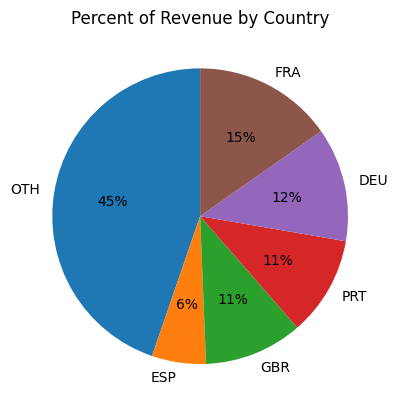

In [163]:
fig, ax = plt.subplots()

ax.pie(
    x=pie_data["LodgingRevenue"],
    startangle=90,
    labels=pie_data.index, 
    autopct="%.0f%%",
);
ax.set_title("Percent of Revenue by Country")

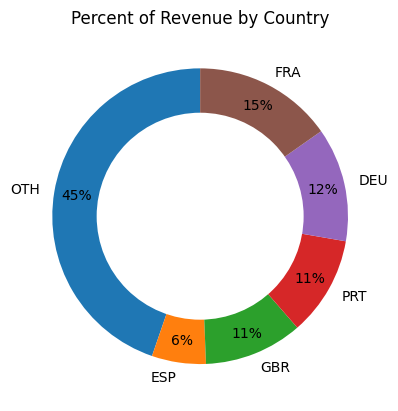

In [168]:
fig, ax = plt.subplots()

ax.pie(
    x=pie_data["LodgingRevenue"],
    startangle=90,
    labels=pie_data.index, 
    autopct="%.0f%%",
    pctdistance=0.85
);
ax.set_title("Percent of Revenue by Country")

donut_hole = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
fig.gca().add_artist(donut_hole)



# Assignment 6: Scatterplots & Histograms

* Build a scatterplot comparing average nights stayed by country to average revenue per customer by country.
* Then, build a bubble chart by specifying the size of the bubbles as the average nightly revenue.
* Finally, build a histogram comparing customer age in Germany to the Customer age in france. Make sure to tweak your alpha!

Column Creation Code:

<mark style="background-color: black">
    hotels.assign(total_revenue = hotels["LodgingRevenue"] + hotels["OtherRevenue"],
                      revenue_per_night = lambda x: x["total_revenue"] / x["RoomNights"])</mark>


Thanks!

In [175]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID                    83590 non-null  int64         
 1   Nationality           83590 non-null  object        
 2   Age                   79811 non-null  float64       
 3   DaysSinceCreation     83590 non-null  int64         
 4   AverageLeadTime       83590 non-null  int64         
 5   LodgingRevenue        83590 non-null  float64       
 6   OtherRevenue          83590 non-null  float64       
 7   BookingsCanceled      83590 non-null  int64         
 8   BookingsNoShowed      83590 non-null  int64         
 9   BookingsCheckedIn     83590 non-null  int64         
 10  PersonsNights         83590 non-null  int64         
 11  RoomNights            83590 non-null  int64         
 12  DaysSinceLastStay     83590 non-null  int64         
 13  DaysSinceFirstSt

In [185]:
hotels_sub = (
    hotels
    .assign(
        total_revenue = hotels["LodgingRevenue"] + hotels["OtherRevenue"],
        revenue_per_night = lambda x: x["total_revenue"] / x["RoomNights"])
)

hotels_sub

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,date,country,total_revenue,revenue_per_night
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,2018-08-03,PRT,476.3,95.260000
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,2016-01-01,PRT,333.0,66.600000
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,2016-01-01,DEU,0.0,NaN
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,2016-01-01,FRA,300.0,60.000000
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,2016-01-01,FRA,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,83586,ITA,54.0,0,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,2018-12-31,OTH,0.0,NaN
83586,83587,IRL,47.0,0,109,327.1,277.5,0,0,1,...,1,0,0,0,0,0,2018-12-31,OTH,604.6,201.533333
83587,83588,IRL,53.0,0,0,0.0,0.0,0,0,0,...,1,0,0,0,0,0,2018-12-31,OTH,0.0,NaN
83588,83589,IRL,85.0,0,109,981.3,9.0,0,0,1,...,0,1,0,0,0,0,2018-12-31,OTH,990.3,330.100000


In [222]:
# Now create the aggregated amounts for each country
hotels_sub_agg = (
    hotels_sub
    .groupby("Nationality")
    .agg(
        total_revenue = ("total_revenue", "sum"),
        ave_revenue = ("total_revenue", "mean"),
        avg_age = ("Age", "mean"),
        avg_nights = ("RoomNights", "mean"),
        avg_nightly_revenue = ("revenue_per_night", "mean")
    )
)
hotels_sub_agg

,total_revenue,ave_revenue,avg_age,avg_nights,avg_nightly_revenue
Nationality,,,,,
ABW,2153.22,717.740000,42.666667,3.666667,204.421111
AGO,115174.49,632.826868,41.681319,3.461538,177.745487
AIA,1290.10,430.033333,25.666667,1.666667,232.737500
ALB,4267.88,328.298462,35.153846,2.846154,118.783788
AND,3760.25,537.178571,43.285714,2.000000,283.452381
...,...,...,...,...,...
WLF,137.20,68.600000,32.000000,0.500000,137.200000
WSM,342.00,342.000000,32.000000,2.000000,171.000000
YEM,0.00,0.000000,23.000000,0.000000,NaN


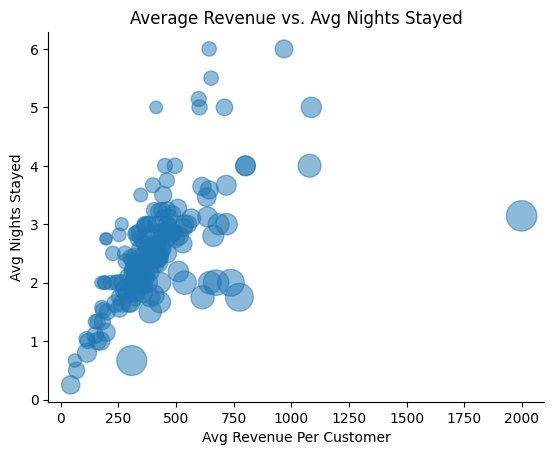

In [200]:
# Now crate a scatter plot with bubles showing the avg revenus vs avg nights stayed
fig, ax = plt.subplots()

ax.scatter(hotels_sub_agg["ave_revenue"], hotels_sub_agg["avg_nights"], s = hotels_sub_agg["avg_nightly_revenue"], alpha = 0.5)

ax.set_title("Average Revenue vs. Avg Nights Stayed")
ax.set_xlabel("Avg Revenue Per Customer")
ax.set_ylabel("Avg Nights Stayed")

ax.spines[["top", "right"]].set_visible(False);


Text(0.5, 0, 'Customer Age')

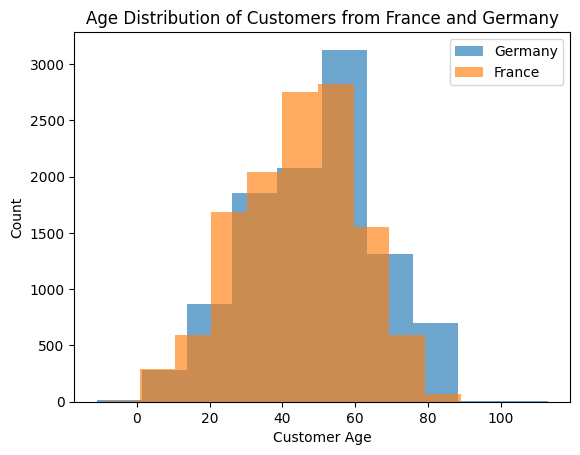

In [234]:
# Now, Show the distribution of customer ages in France and Germany
# We can use the hotels dataframe and filter each plot down to the country of interest
# cntry_list = ["FRA", "DEU"]
# fra_ger
hotels.loc[hotels["Nationality"] == "FRA", "Age"]

fig, ax = plt.subplots()

ax.hist(hotels.loc[hotels["Nationality"] == "DEU", "Age"], 
        alpha = 0.65,
        label = "Germany")

ax.hist(hotels.loc[hotels["Nationality"] == "FRA", "Age"],
        alpha = 0.65, 
        label = "France")

ax.legend()
ax.set_title("Age Distribution of Customers from France and Germany")
ax.set_ylabel("Count")
ax.set_xlabel("Customer Age")


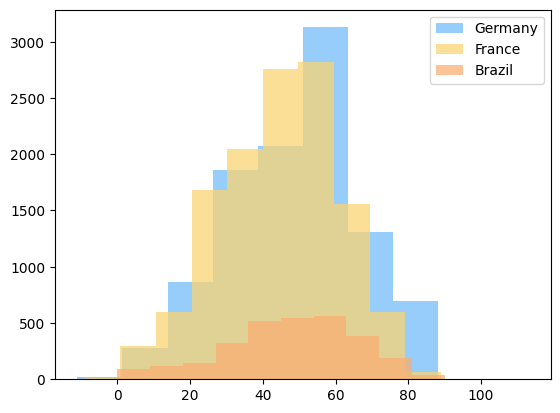

In [241]:
# What if we wanted to use a loop to create a histogram for four countries?
ntly_list = ["DEU", "FRA", "BRA"]
cntry_list = ["Germany", "France", "Brazil"]
cntry_colors = ["#73BDFA", "#FAD573", "#FAAF73"]

fig, ax = plt.subplots()

for i, country in enumerate(ntly_list):
    ax.hist(
        hotels.loc[hotels["Nationality"] == country, "Age"],
        label = cntry_list[i],
        color = cntry_colors[i], 
        alpha = 0.75
    ) 
ax.legend()    